<h1>1. Business Problem </h1>

<h2> 

Founded in 2000 by a high school teacher in the Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount

DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.

Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:

How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible

How to increase the consistency of project vetting across different volunteers to improve the experience for teachers

How to focus volunteer time on the applications that need the most assistance

The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.

With an algorithm to pre-screen applications, DonorsChoose.org can auto-approve some applications quickly so that volunteers can spend their time on more nuanced and detailed project ​vetting processes, including doing more to help teachers develop projects that qualify for specific funding opportunities.

Your machine learning algorithm can help more teachers get funded more quickly, and with less cost to DonorsChoose.org, allowing them to channel even more funding directly to classrooms across the country.

</h2>

<h2> 1.1 Real World / Business Objectives and Constraints </h2>


**A. No latency constraint:**  

**B. Model interpretability important:**


<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<h3> 
Data fields

The files consist of a list of product listings. These files are tab-delimited.

** project essay dataset ** 

* id - unique id of the project application
* teacher_id - id of the teacher submitting the application
* teacher_prefix - title of the teacher's name (Ms., Mr., etc.)
* school_state - US state of the teacher's school
* project_submitted_datetime - application submission timestamp
* project_grade_category - school grade levels (PreK-2, 3-5, 6-8, and 9-12)
* project_subject_categories - category of the project (e.g., "Music & The Arts")
* project_subject_subcategories - sub-category of the project (e.g., "Visual Arts")
* project_title - title of the project
* project_essay_1 - first essay*
* project_essay_2 - second essay*
* project_essay_3 - third essay*
* project_essay_4 - fourth essay*
* project_resource_summary - summary of the resources needed for the project
* teacher_number_of_previously_posted_projects - number of previously posted * applications by the submitting teacher
* project_is_approved - whether DonorsChoose proposal was accepted (0="rejected", 1="accepted"); train.csv only
* Note: Prior to May 17, 2016, the prompts for the essays were as follows:

* project_essay_1: "Introduce us to your classroom"
* project_essay_2: "Tell us more about your students"
* project_essay_3: "Describe how your students will use the materials you're requesting"
* project_essay_4: "Close by sharing why your project will make a difference" 

** Resource dataset **

Proposals also include resources requested. Each project may include multiple requested resources. Each row in resources.csv corresponds to a resource, so multiple rows may tie to the same project by id.

* id - unique id of the project application; joins with test.csv. and train.csv on id
* description - description of the resource requested
* quantity - quantity of resource requested
* price - price of resource requested

 </h3>

Refer: https://www.kaggle.com/c/donorschoose-application-screening/overview/evaluation

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a classification problem  <br>

<h3>2.2.2 Performance metric </h3>

<p> The goal of this competition is to predict whether an application to DonorsChoose is accepted. Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target. <br>




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wordcloud

In [ ]:
%matplotlib inline
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd 
import datetime 
import time 
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression 
from scipy import stats
import scipy
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore") 


In [ ]:
project_data = pd.read_csv('/content/drive/MyDrive/6_Donors_choose_NB/train_data.csv')

In [ ]:
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [ ]:
project_data.shape

(109248, 17)

In [ ]:
project_data.isnull().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

In [ ]:
resource_data = pd.read_csv('/content/drive/MyDrive/6_Donors_choose_NB/resources.csv')

In [ ]:
resource_data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [ ]:
resource_data.shape

(1541272, 4)

In [ ]:
resource_data.isnull().sum()

id               0
description    292
quantity         0
price            0
dtype: int64

#### Concat resource data with project data to do more analysis

In [ ]:
resource_data['price'].value_counts()

29.99     29890
19.99     24729
9.99      21408
49.99     20916
14.99     19429
          ...  
454.94        1
181.46        1
153.77        1
445.43        1
451.19        1
Name: price, Length: 26890, dtype: int64

In [ ]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity': 'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [ ]:
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1


#### Exploratory Data Analysis

#### create new categories with in sub categories 

In [ ]:
# Feature Engineering (1): Creating new Category Features
def transform_subcategory_name(subcategory_name):
    try:
        sub1, sub2= subcategory_name.split(',')
        return sub1, sub2
    except:
        return 'Other','Other'

In [ ]:
project_data['subject_category_1'], project_data['subject_category_2'] = zip(*project_data['project_subject_subcategories'].apply(transform_subcategory_name))

subcat_train = project_data[['subject_category_1','subject_category_2', 'price']]

subcat_train.head()

,subject_category_1,subject_category_2,price
0,ESL,Literacy,154.60
1,Civics & Government,Team Sports,299.00
2,Health & Wellness,Team Sports,516.85
3,Literacy,Mathematics,232.90
4,Other,Other,67.98


In [ ]:
project_data['subject_category_1'].value_counts()

Other                    43159
Literacy                 17885
Literature & Writing      8613
Applied Sciences          8322
ESL                       3834
Health & Wellness         3616
Environmental Science     3296
Gym & Fitness             3236
Early Development         2906
Mathematics               2055
History & Geography       1907
Character Education       1679
Health & Life Science     1679
College & Career Prep     1613
Warmth                    1309
Music                     1138
Civics & Government        716
Foreign Languages          436
Extracurricular            383
Special Needs              344
Community Service          271
Financial Literacy         252
Economics                  188
Performing Arts            138
Social Sciences            128
Parent Involvement          75
Nutrition Education         64
Team Sports                  6
Name: subject_category_1, dtype: int64

In [ ]:
project_data['subject_category_2'].value_counts()

Other                     42780
 Mathematics              20637
 Literature & Writing      9061
 Special Needs             9049
 Literacy                  6324
 Visual Arts               4059
 Health & Wellness         3017
 Health & Life Science     1726
 Social Sciences           1592
 Performing Arts           1423
 Care & Hunger             1309
 Environmental Science     1213
 Other                     1161
 Team Sports               1125
 Nutrition Education       1016
 History & Geography        723
 Parent Involvement         556
 Music                      535
 College & Career Prep      533
 Early Development          440
 Extracurricular            294
 Financial Literacy         152
 Community Service          115
 ESL                        112
 Foreign Languages          104
 Gym & Fitness               77
 Character Education         53
 Economics                   43
 Civics & Government         19
Name: subject_category_2, dtype: int64

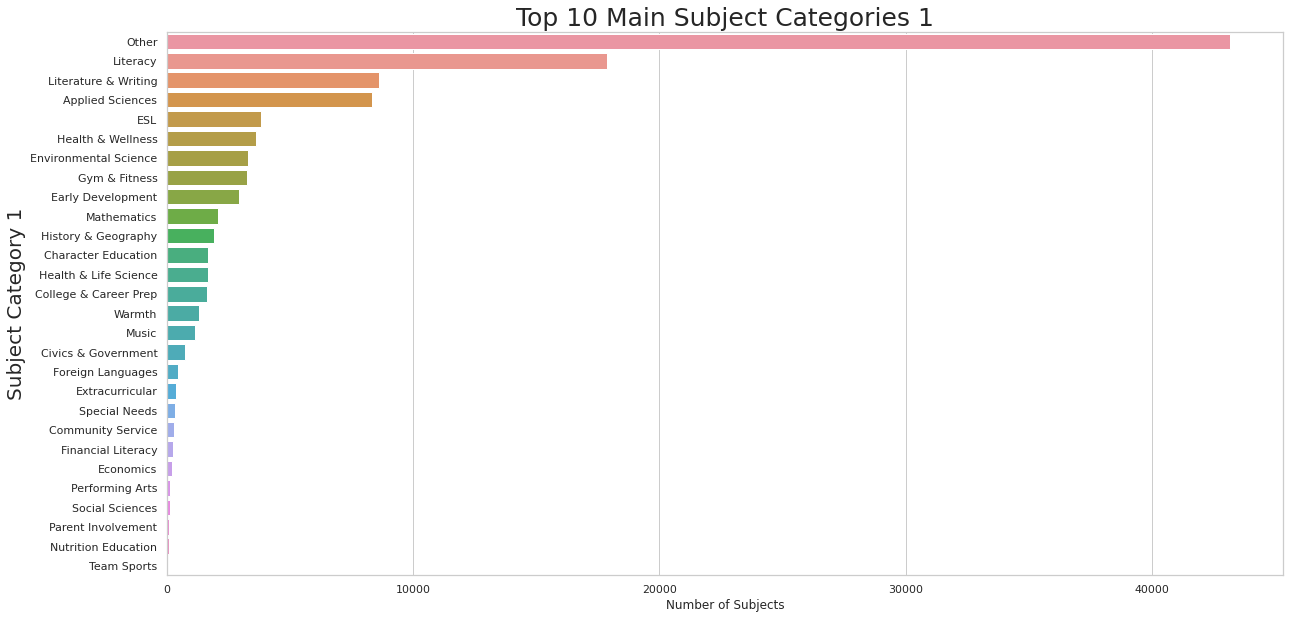

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(y = project_data['subject_category_1'], order = project_data['subject_category_1'].value_counts().index, orient = 'v')
plt.title('Top 10 Main Subject Categories 1', fontsize = 25)
plt.ylabel('Subject Category 1', fontsize = 20)
plt.xlabel('Number of Subjects')
plt.show()

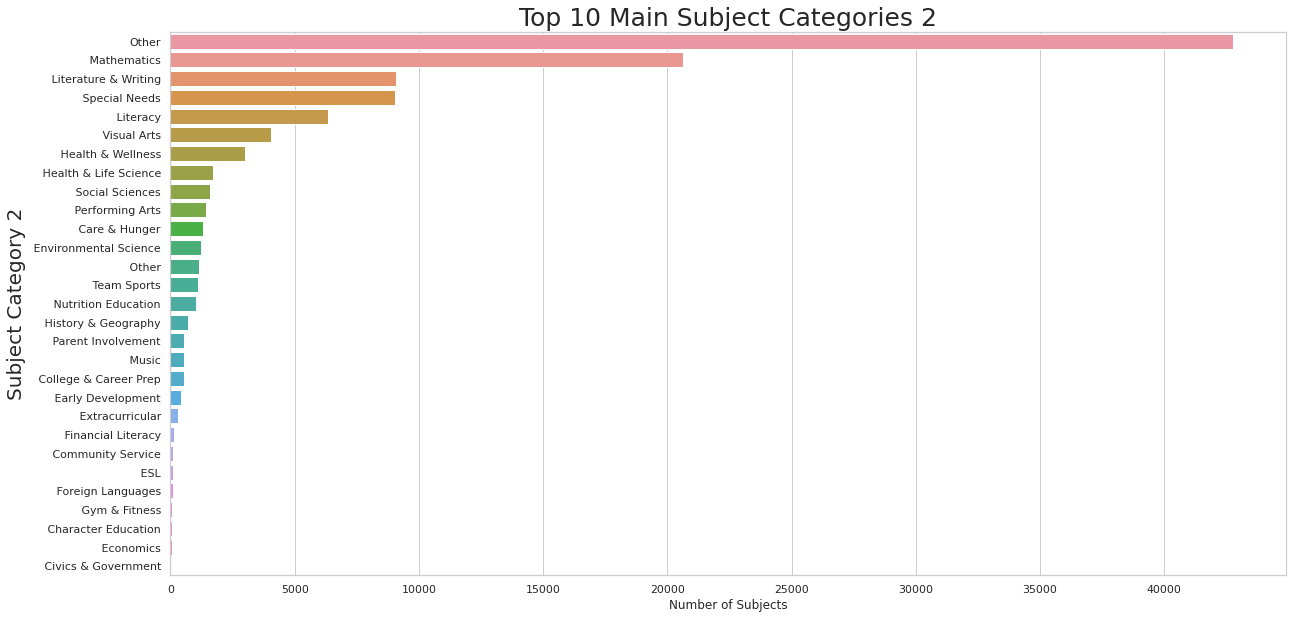

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(y = project_data['subject_category_2'], order = project_data['subject_category_2'].value_counts().index, orient = 'v')
plt.title('Top 10 Main Subject Categories 2', fontsize = 25)
plt.ylabel('Subject Category 2', fontsize = 20)
plt.xlabel('Number of Subjects')
plt.show()

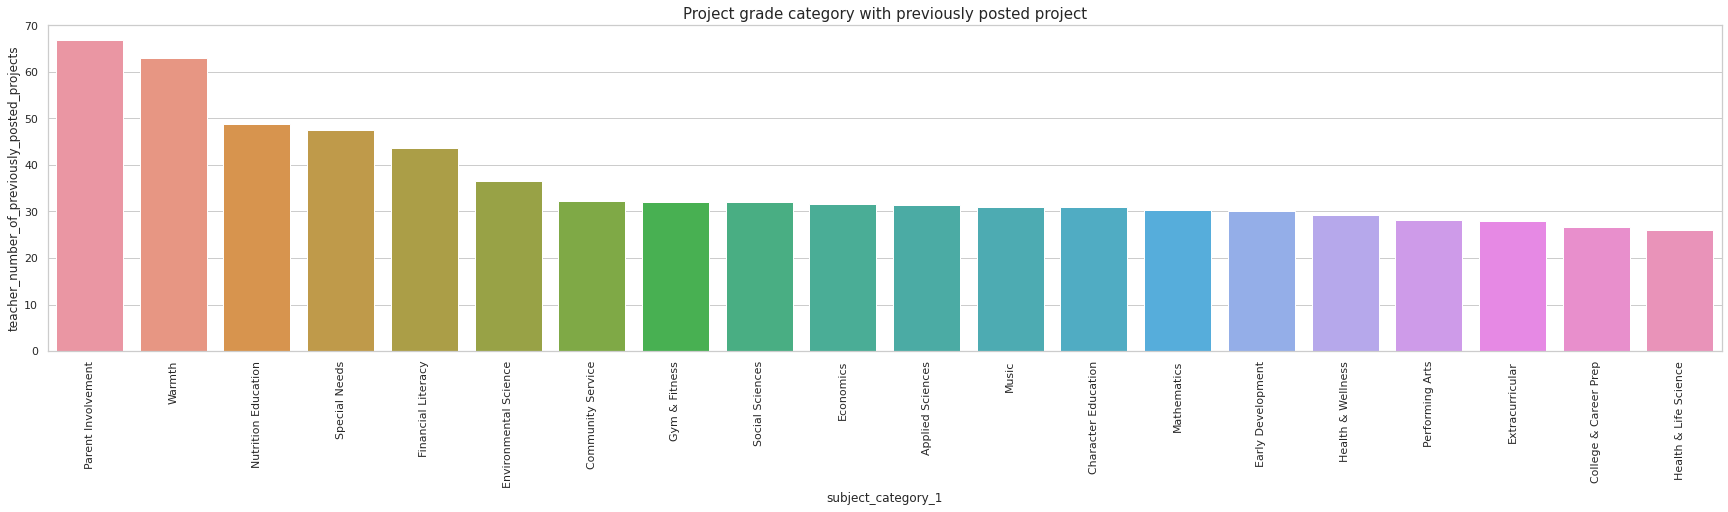

In [ ]:
plt.figure(figsize=(30, 6))
top_20_exp_brand = pd.DataFrame(project_data.groupby(['subject_category_1'],as_index=True).std().teacher_number_of_previously_posted_projects.sort_values(ascending=False)[0:20]).reset_index()
ax = sns.barplot(x="subject_category_1", y="teacher_number_of_previously_posted_projects", data=top_20_exp_brand)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Project grade category with previously posted project', fontsize=15)
plt.show()

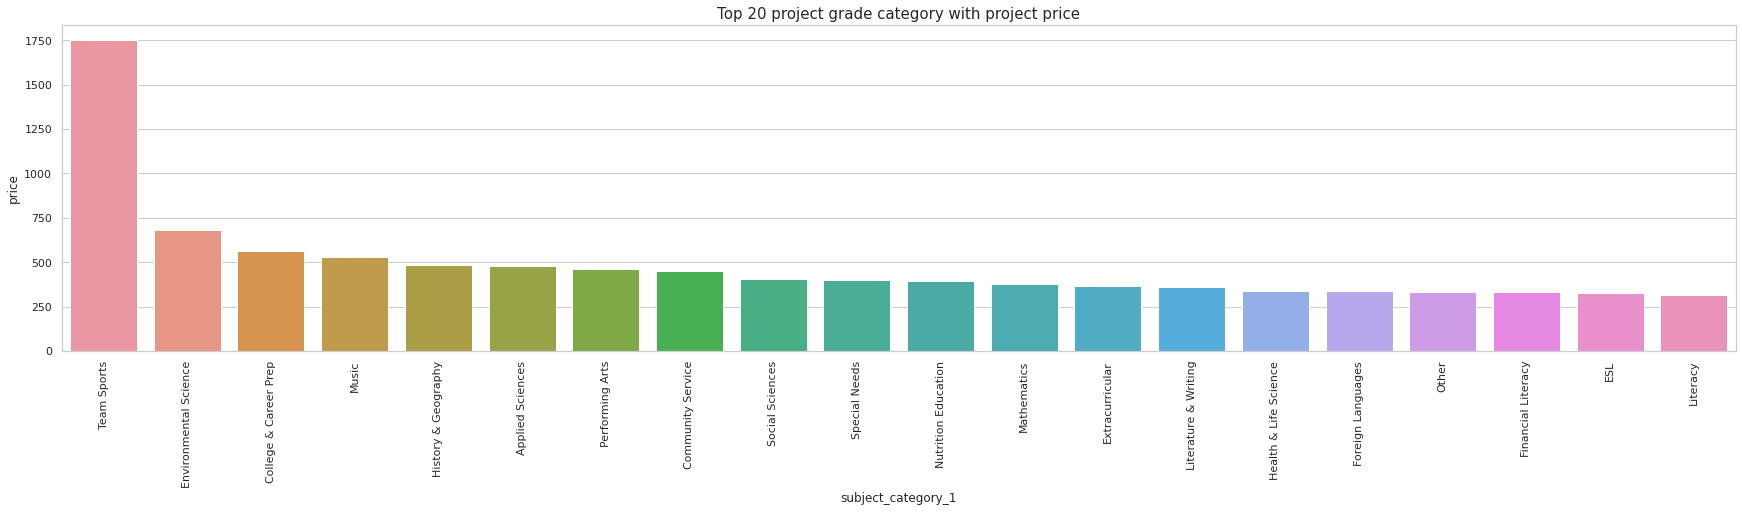

In [ ]:
plt.figure(figsize=(30, 6))
top_20_exp_brand = pd.DataFrame(project_data.groupby(['subject_category_1'],as_index=True).std().price.sort_values(ascending=False)[0:20]).reset_index()
ax = sns.barplot(x="subject_category_1", y="price", data=top_20_exp_brand)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 project grade category with project price', fontsize=15)
plt.show()

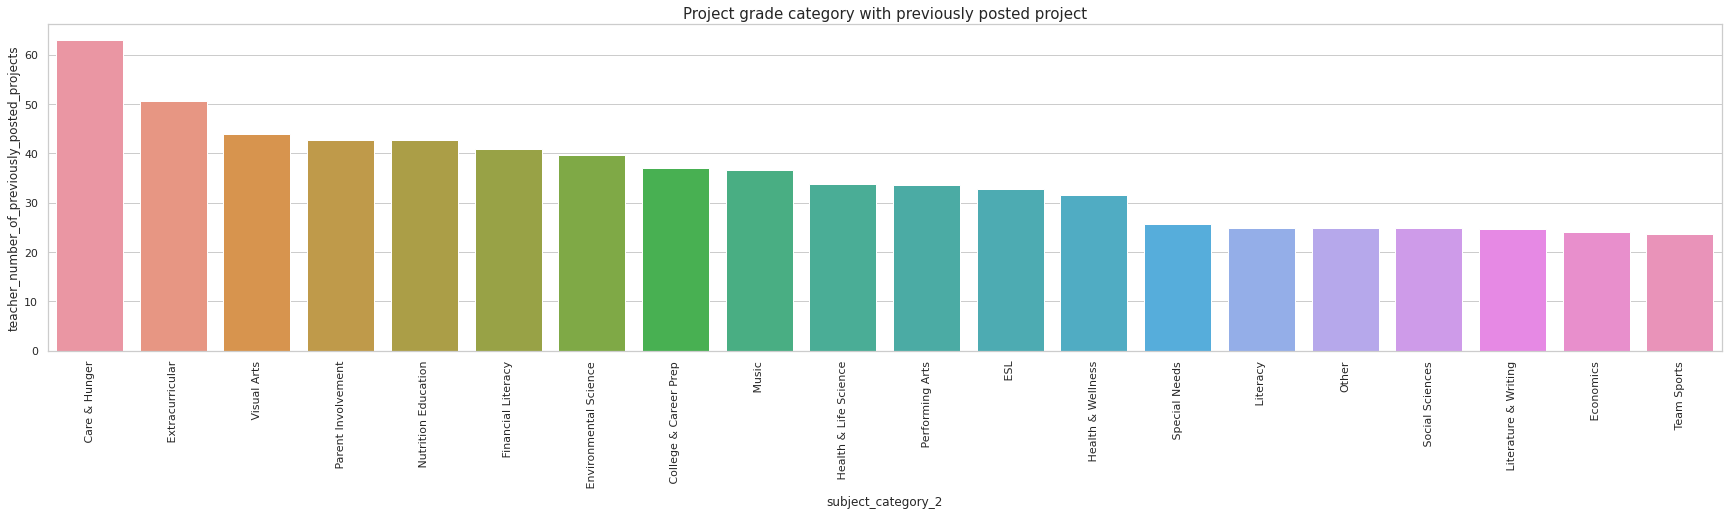

In [ ]:
plt.figure(figsize=(30, 6))
top_20_exp_brand = pd.DataFrame(project_data.groupby(['subject_category_2'],as_index=True).std().teacher_number_of_previously_posted_projects.sort_values(ascending=False)[0:20]).reset_index()
ax = sns.barplot(x="subject_category_2", y="teacher_number_of_previously_posted_projects", data=top_20_exp_brand)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Project grade category with previously posted project', fontsize=15)
plt.show()

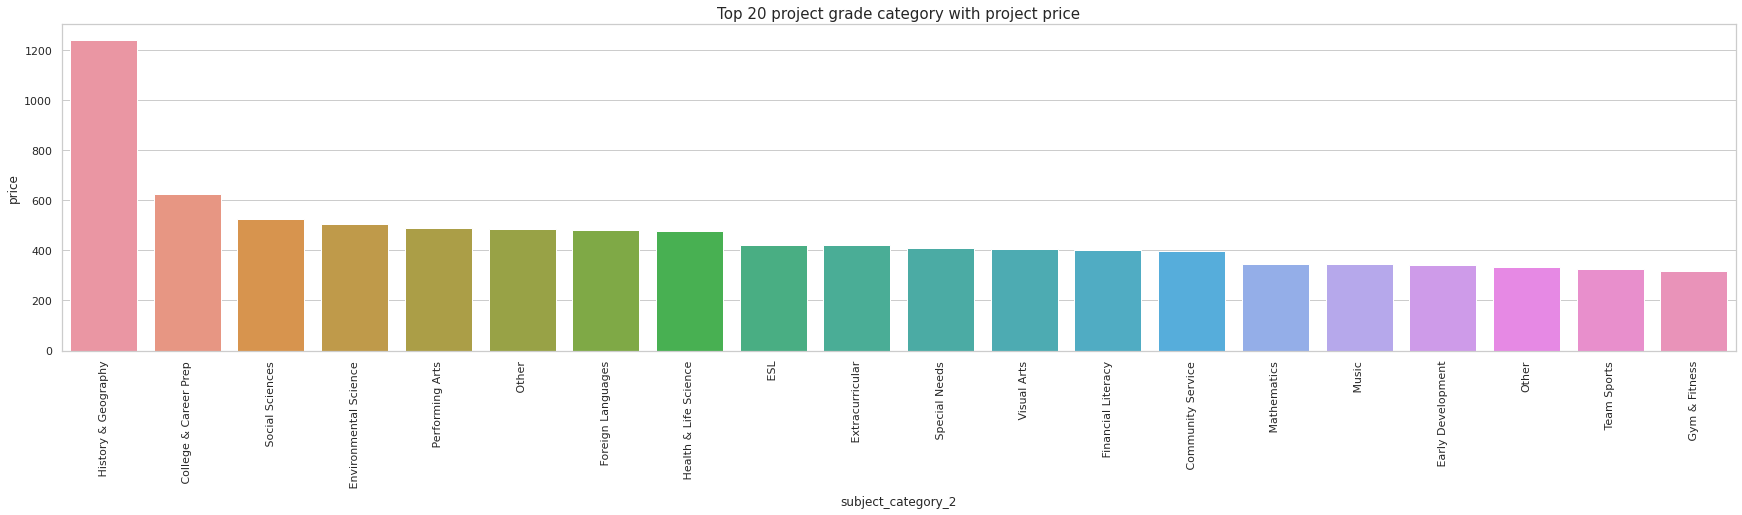

In [ ]:
plt.figure(figsize=(30, 6))
top_20_exp_brand = pd.DataFrame(project_data.groupby(['subject_category_2'],as_index=True).std().price.sort_values(ascending=False)[0:20]).reset_index()
ax = sns.barplot(x="subject_category_2", y="price", data=top_20_exp_brand)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 project grade category with project price', fontsize=15)
plt.show()

#### Project title

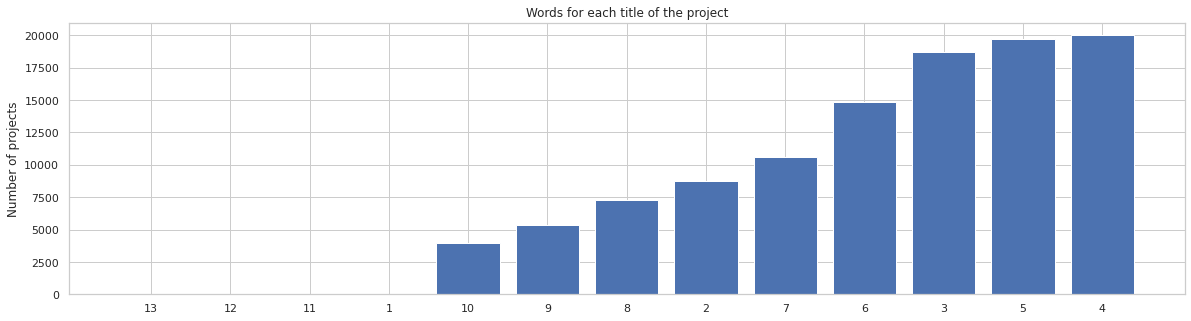

In [ ]:
words_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(words_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))

ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

Text(0.5, 1.0, 'most frequently occuring project title words - Top 30')

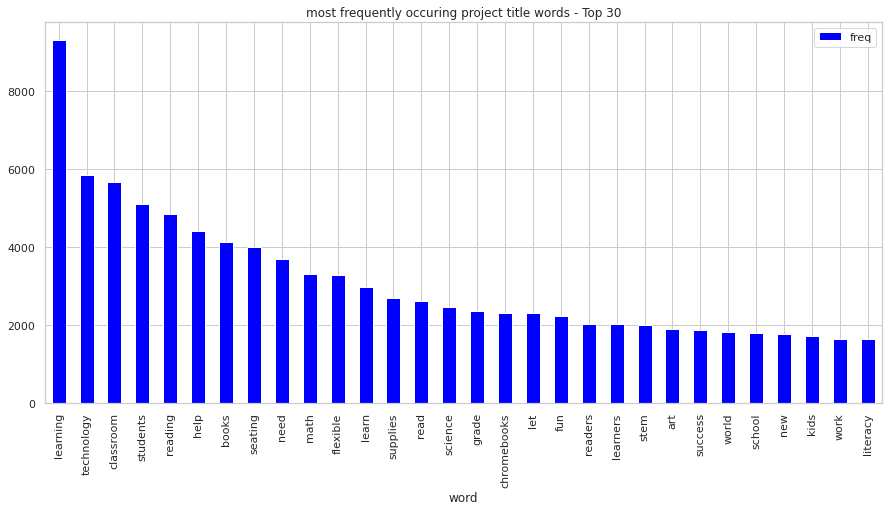

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')
words = cv1.fit_transform(project_data.project_title)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0,i]) for word, i in cv1.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word','freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7), color='blue')
plt.title('most frequently occuring project title words - Top 30')

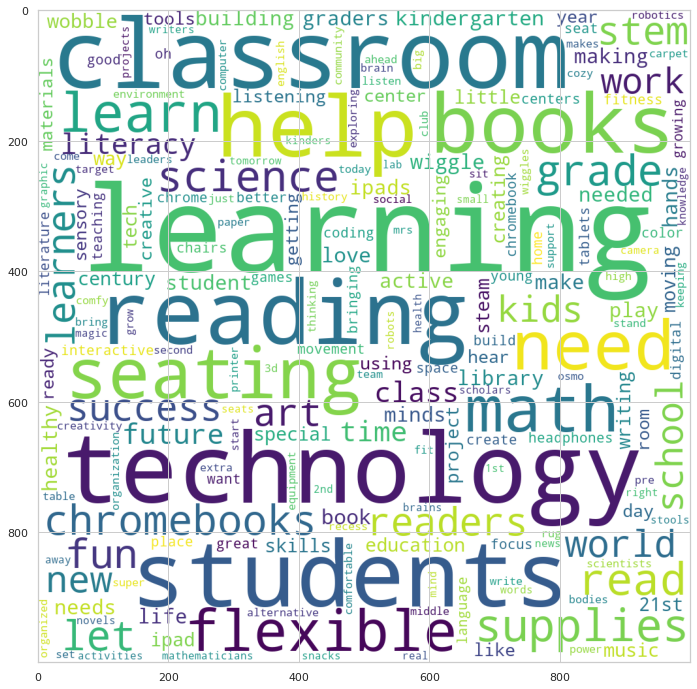

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(14,12))
plt.imshow(wordcloud)
plt.show("WordCloud - Most frequent project titles")

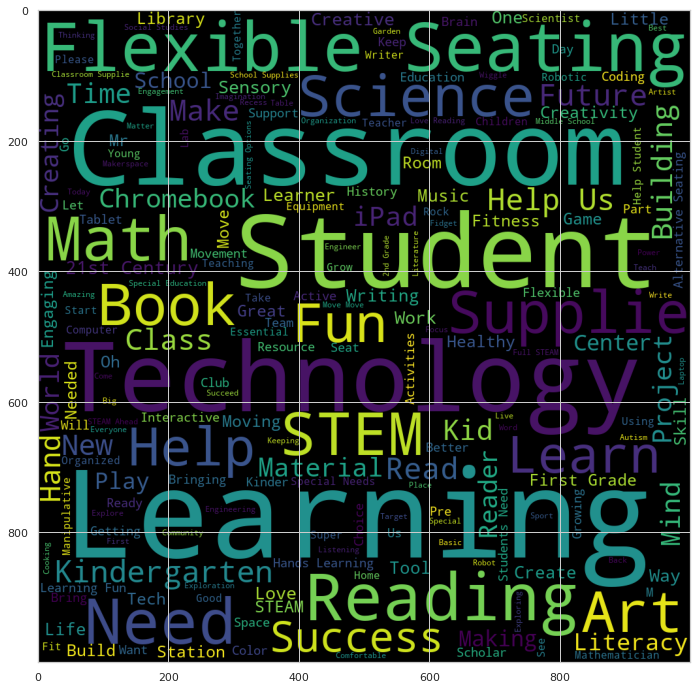

In [ ]:
rejected_title = " ".join([text for text in project_data['project_title'][project_data['project_is_approved'] == 0]])

wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(rejected_title)

plt.figure(figsize=(14,12))
plt.imshow(wordcloud)
plt.show("WordCloud - Most frequent project titles that are not approved")

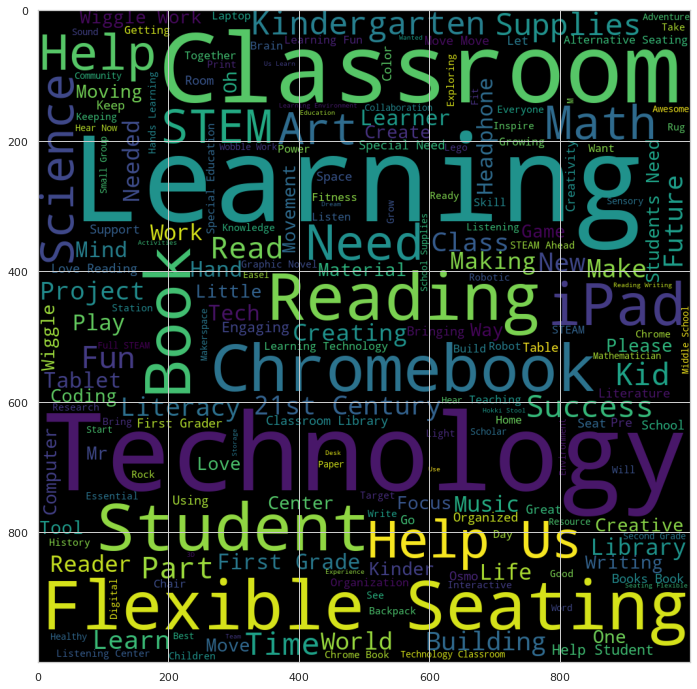

In [ ]:
accepted_title = " ".join([text for text in project_data['project_title'][project_data['project_is_approved'] == 1]])

wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(accepted_title)

plt.figure(figsize=(14,12))
plt.imshow(wordcloud)
plt.show("WordCloud - Most frequent project titles that are approved")

In [ ]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

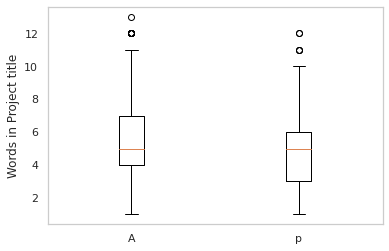

In [ ]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved projects, Rejected Projects'))
plt.ylabel('Words in Project title')
plt.grid()
plt.show()

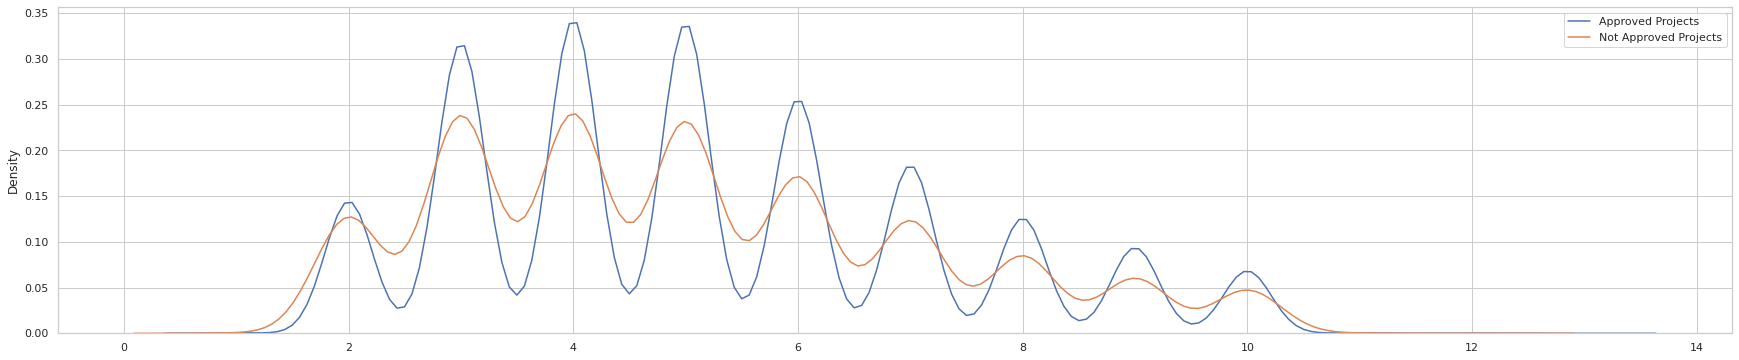

In [ ]:
plt.figure(figsize=(30,6))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

#### Project summary

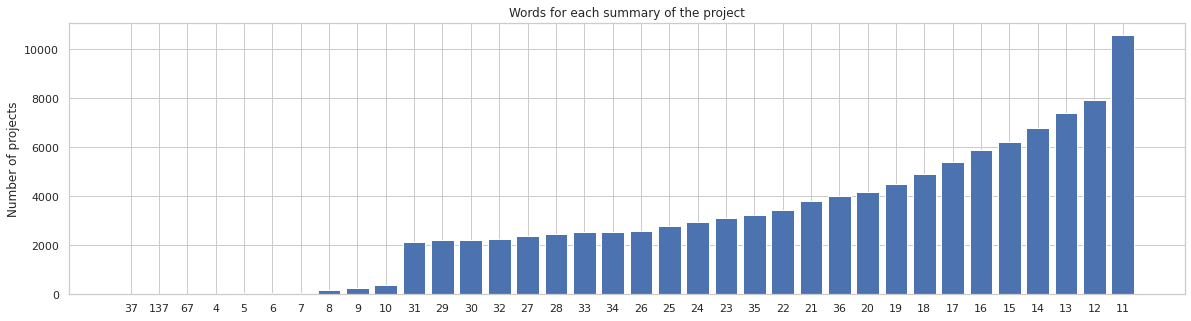

In [ ]:
words_count = project_data['project_resource_summary'].str.split().apply(len).value_counts()
word_dict = dict(words_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))

ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.title('Words for each summary of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

Text(0.5, 1.0, 'most frequently occuring project summary words - Top 30')

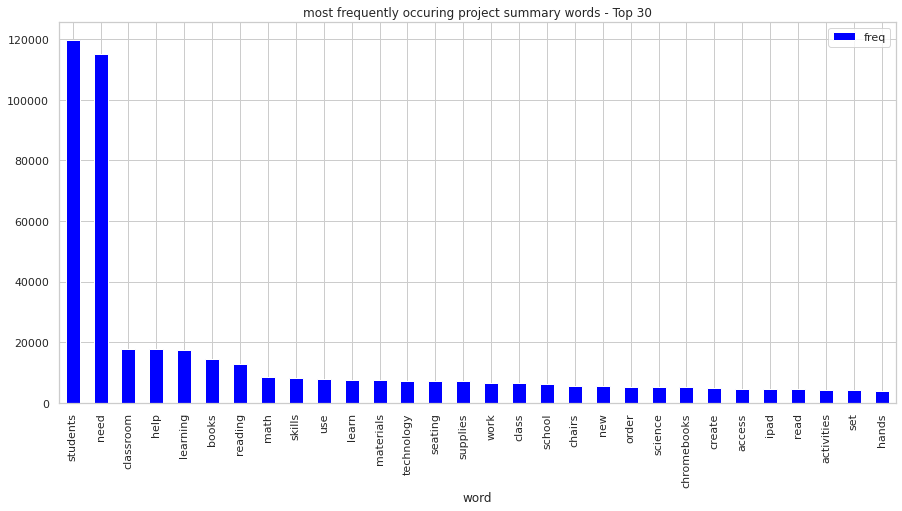

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv3 = CountVectorizer(stop_words='english')
words = cv3.fit_transform(project_data.project_resource_summary)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0,i]) for word, i in cv3.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word','freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7), color='blue')
plt.title('most frequently occuring project summary words - Top 30')

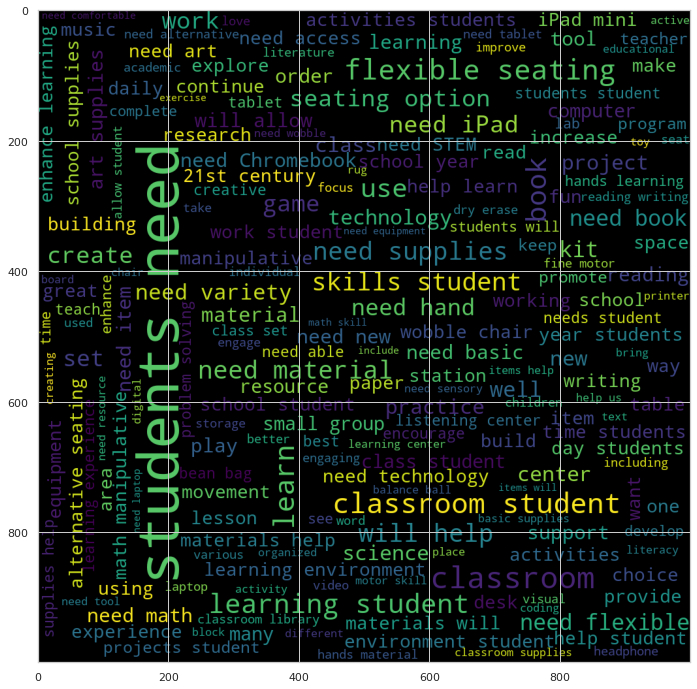

In [ ]:
rejected_summary = " ".join([text for text in project_data['project_resource_summary'][project_data['project_is_approved'] == 0]])

wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(rejected_summary)

plt.figure(figsize=(14,12))
plt.imshow(wordcloud)
plt.show("WordCloud - Rejected projects with most frequent words in summary")

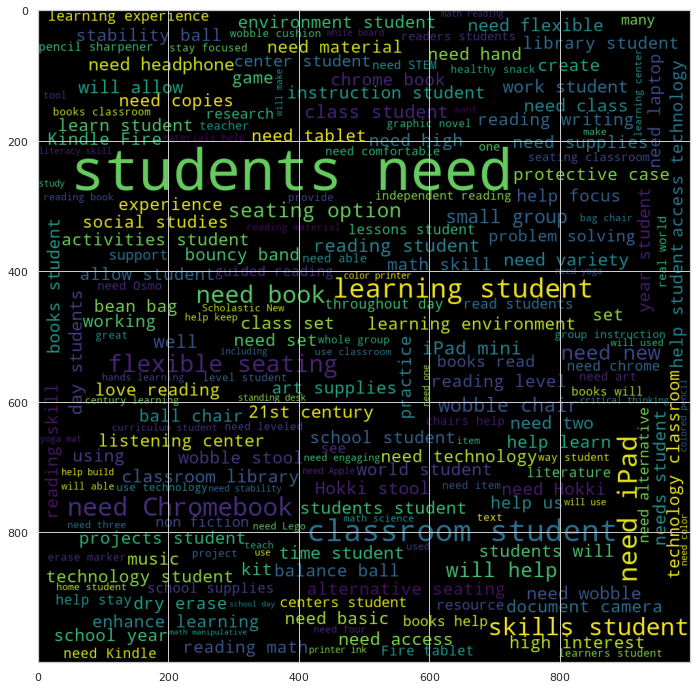

In [ ]:
accepted_summary = " ".join([text for text in project_data['project_resource_summary'][project_data['project_is_approved'] == 1]])

wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(accepted_summary)

plt.figure(figsize=(14,12))
plt.imshow(wordcloud)
plt.show("WordCloud - Accepted projects with most frequent words in summary")

In [ ]:
approved_word_count_summary = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
approved_word_count_summary = approved_word_count_summary.values

rejected_word_count_summary = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)
rejected_word_count_summary = rejected_word_count_summary.values

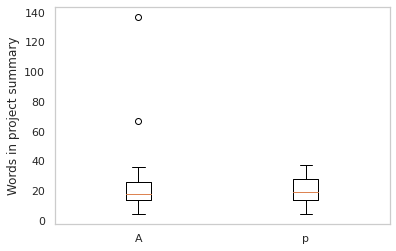

In [ ]:
plt.boxplot([approved_word_count_summary, rejected_word_count_summary])
plt.xticks([1,2],('Approved projects, Rejected Projects'))
plt.ylabel('Words in project summary')
plt.grid()
plt.show()

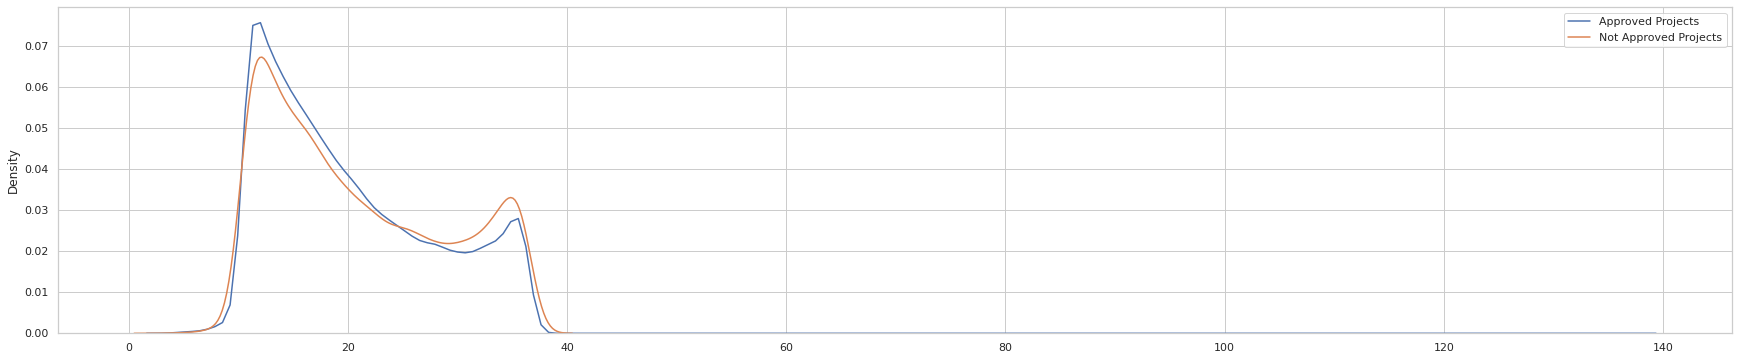

In [ ]:
plt.figure(figsize=(30,6))
sns.distplot(approved_word_count_summary, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count_summary, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

#### Numerical features

#### price

Text(0.5, 1.0, 'Project Price Distribution')

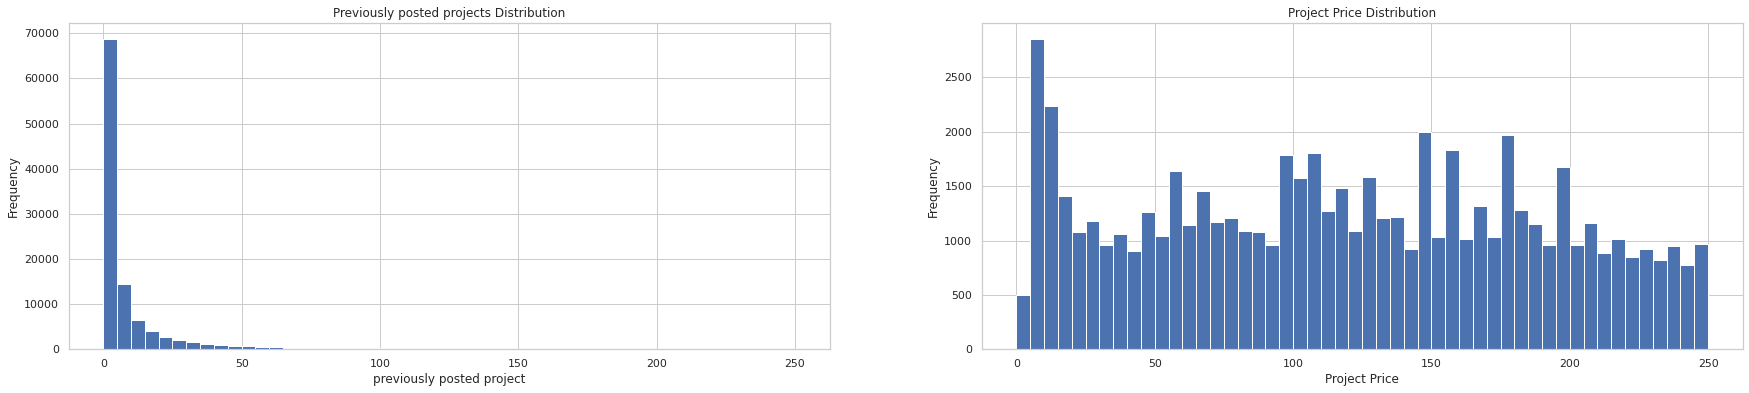

In [ ]:
plt.subplot(1, 2, 1)
(project_data['teacher_number_of_previously_posted_projects']).plot.hist(bins=50, figsize=(30, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('previously posted project', fontsize=12)
plt.title('Previously posted projects Distribution', fontsize=12)

plt.subplot(1, 2, 2)
(project_data['price']).plot.hist(bins=50, figsize=(30, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('Project Price', fontsize=12)
plt.title('Project Price Distribution', fontsize=12)


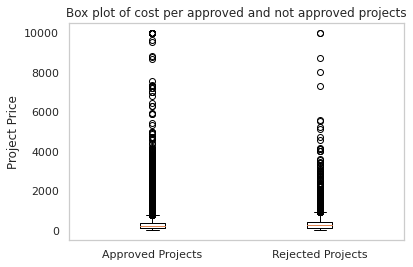

In [ ]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values
rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

plt.boxplot([approved_price, rejected_price])
plt.title('Box plot of cost per approved and not approved projects')
plt.xticks([1,2],('Approved Projects', 'Rejected Projects'))
plt.ylabel('Project Price')
plt.grid()
plt.show()

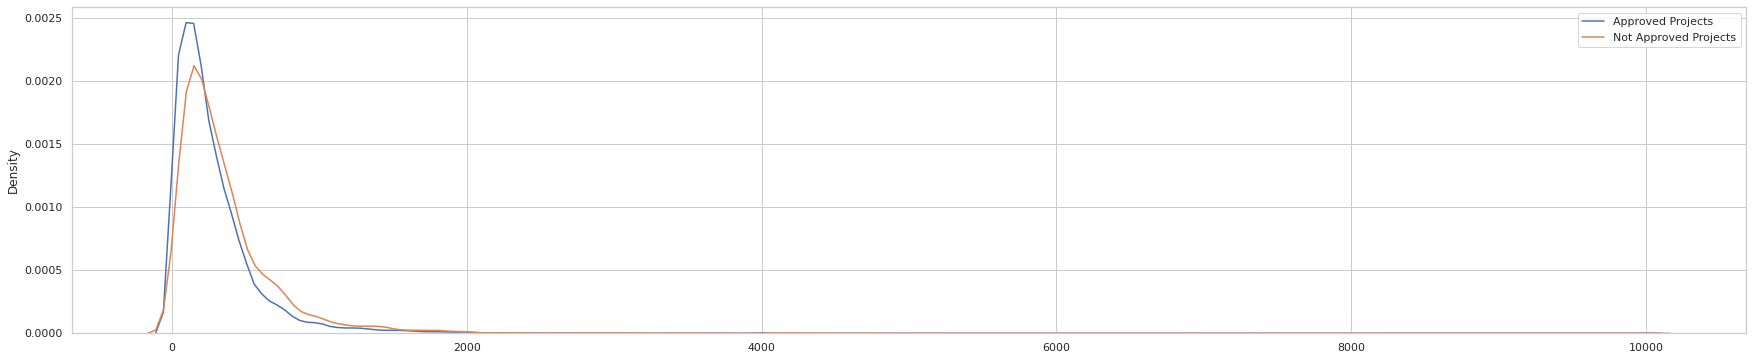

In [ ]:
plt.figure(figsize=(30,6))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Percentile', 'Approved Projects', 'Not Approved Projects']

for i in range(0,101,5):
  x.add_row([i, np.round(np.percentile(approved_price,i),3), np.round(np.percentile(rejected_price,i),3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

#### Previously posted projects

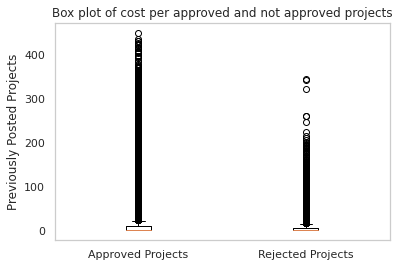

In [ ]:
approved_previous_projects = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
rejected_previous_projects = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

plt.boxplot([approved_previous_projects, rejected_previous_projects])
plt.title('Box plot of cost per approved and not approved projects')
plt.xticks([1,2],('Approved Projects', 'Rejected Projects'))
plt.ylabel('Previously Posted Projects')
plt.grid()
plt.show()

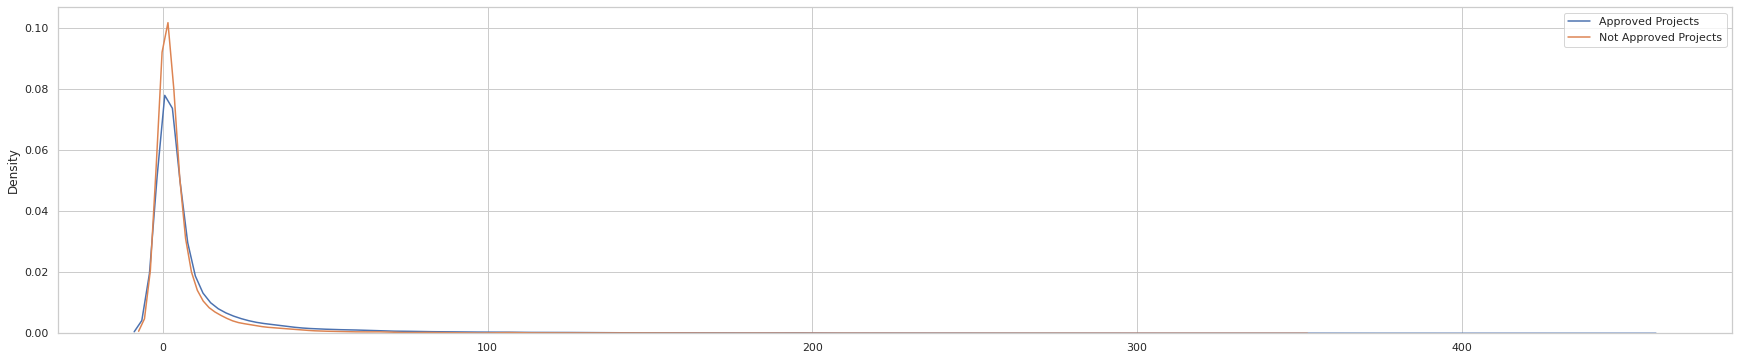

In [ ]:
plt.figure(figsize=(30,6))
sns.distplot(approved_previous_projects, hist=False, label="Approved Projects")
sns.distplot(rejected_previous_projects, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()